In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# Import Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [4]:
import os
os.chdir('D:Dataset/')

In [5]:
df=pd.read_csv("Diwali Sales Data.csv", encoding = 'unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#drop unrelated or blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
#check for null_values

df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
#fill or drop the null_values

df['Amount']=df['Amount'].fillna(df['Amount'].median())

In [14]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
#change data_type of amount

df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int32')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9452.176429
std,1.716125e+03,12.754122,0.493632,1.115047,5219.753707
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
# use describe() for specific columns

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9452.176429
std,12.754122,1.115047,5219.753707
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

# Gender

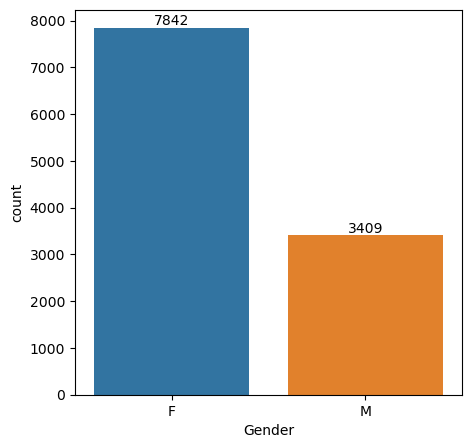

In [20]:
#plotting a bar chart for Gender and it's count

figure=plt.figure(figsize=(5,5))

count_bar=sns.countplot(x=df['Gender'])

for bars in count_bar.containers:
    count_bar.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

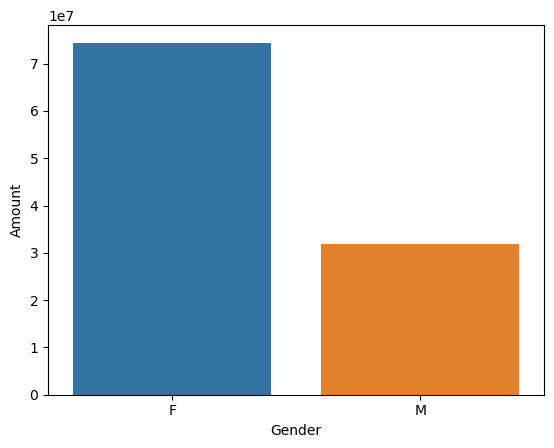

In [21]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x= 'Gender', y= 'Amount', data=sales_gen)

From above graphs we can see that the most of the buyers are females and even the purchasing power of the female is greater than the men.

# Age

In [22]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

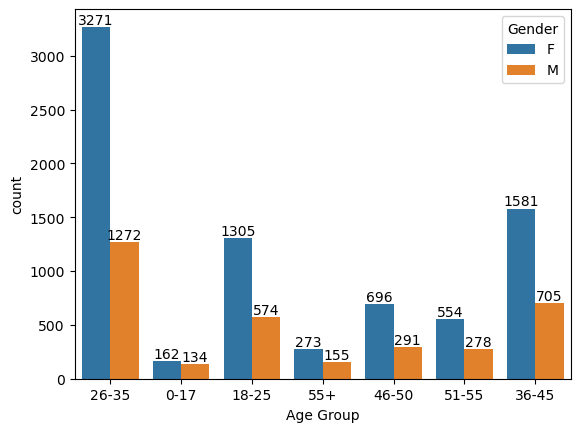

In [23]:
ax=sns.countplot(x=df['Age Group'], hue= df['Gender'])

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

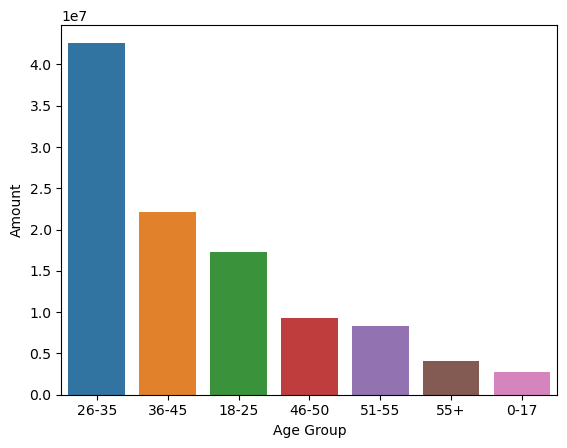

In [24]:
#Total Amount vs Age Group


age=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x= 'Age Group', y= 'Amount', data= age)

From above graphs we get to know that the most of the female buyers are from between the age group of 26-35 years old.

# State

In [25]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

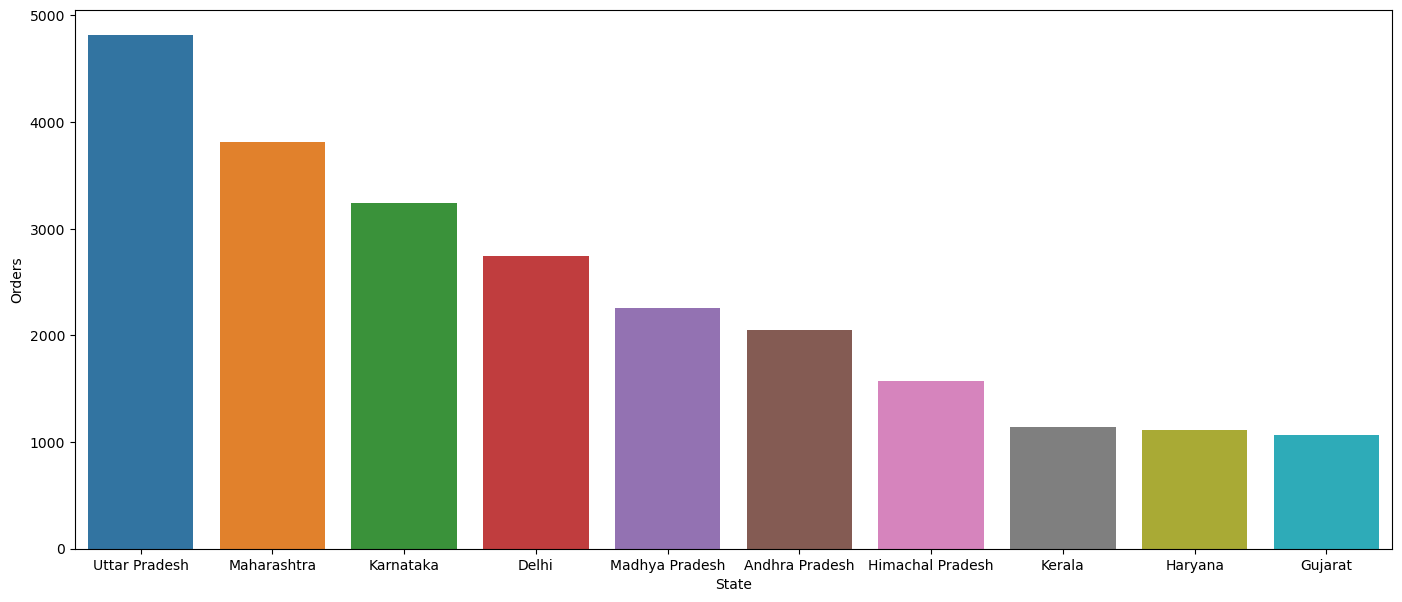

In [26]:
#Total number of orders from top 10 states

figure=plt.figure(figsize=(17,7))

sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)

sns.barplot(x= 'State', y= 'Orders', data= sales_state)

From above graphs we can see that the number of orders from the top 10 states are Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh, Himachal Pradesh, Kerala, Haryana, Gujarat.

<Axes: xlabel='State', ylabel='Amount'>

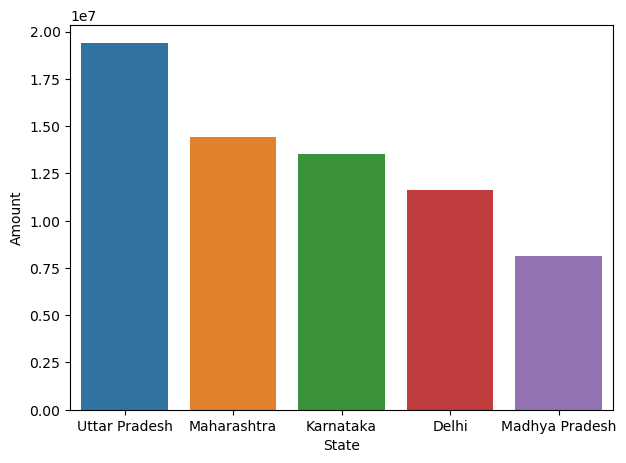

In [27]:
# total amount/sales from top 5 states

figure=plt.figure(figsize=(7,5))

sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(['Amount'],ascending=False).head(5)

sns.barplot(x= 'State', y= 'Amount', data= sales_state)

From above graphs we can see that the most of the orders are from Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh respectively.

# Marital Status

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

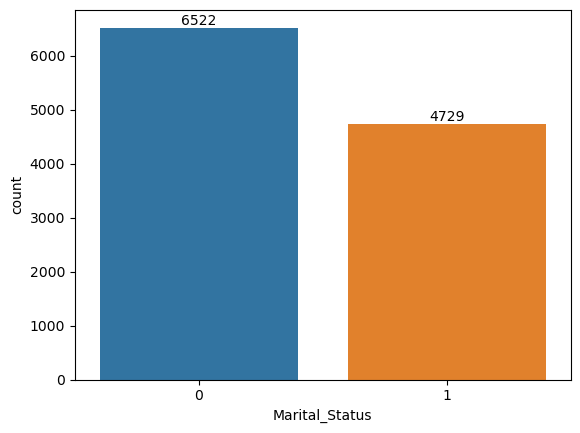

In [29]:
marital=sns.countplot(x=df['Marital_Status'])

for bars in marital.containers:
    marital.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

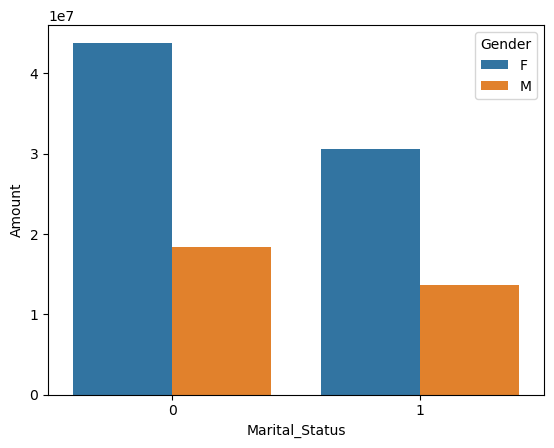

In [30]:
sales_state=df.groupby(['Gender','Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x= 'Marital_Status', y= 'Amount', hue='Gender', data= sales_state)

From the above graphs we can see that the most of the buyers are married (womens) and they have high purchasing power.

# Occupation

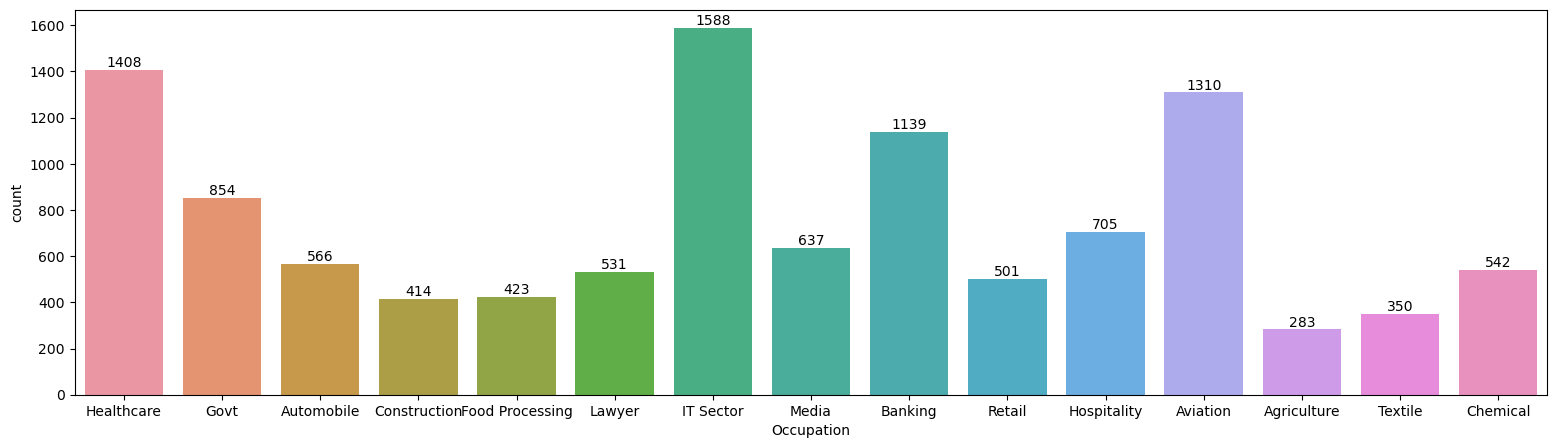

In [31]:
figure=plt.figure(figsize=(19,5))


ax=sns.countplot(x= df['Occupation'])

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

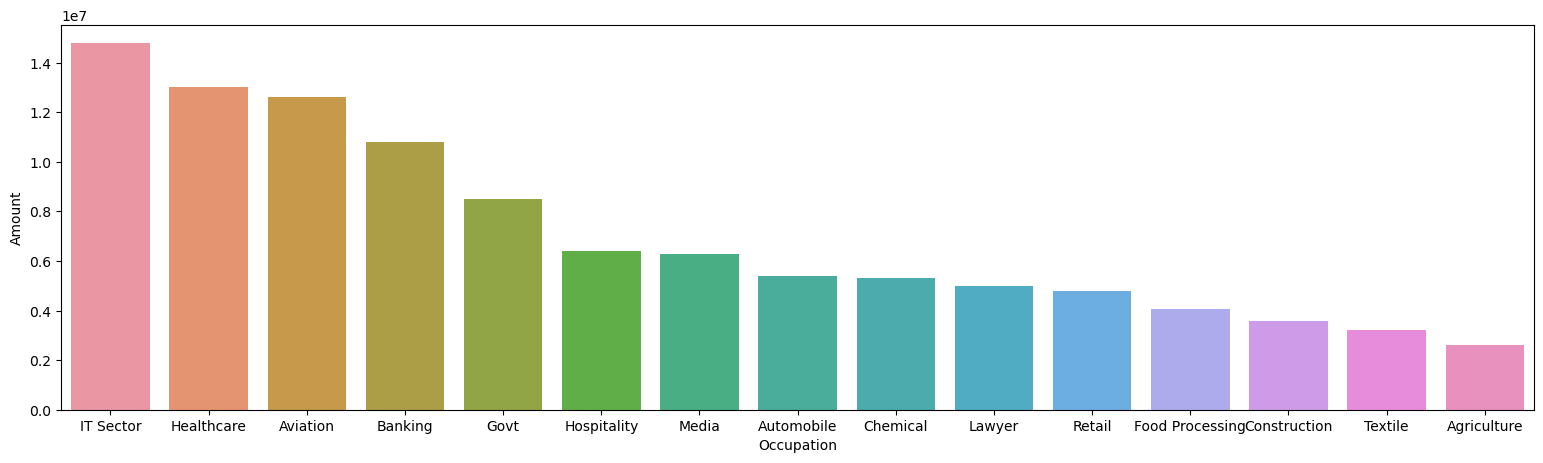

In [32]:
figure=plt.figure(figsize=(19,5))


sales_state=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x= 'Occupation', y= 'Amount', data= sales_state)

From the above graphs we can see that the most of the buyers are from IT, HealthCare and Aviation sector.

# Product Category

In [33]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

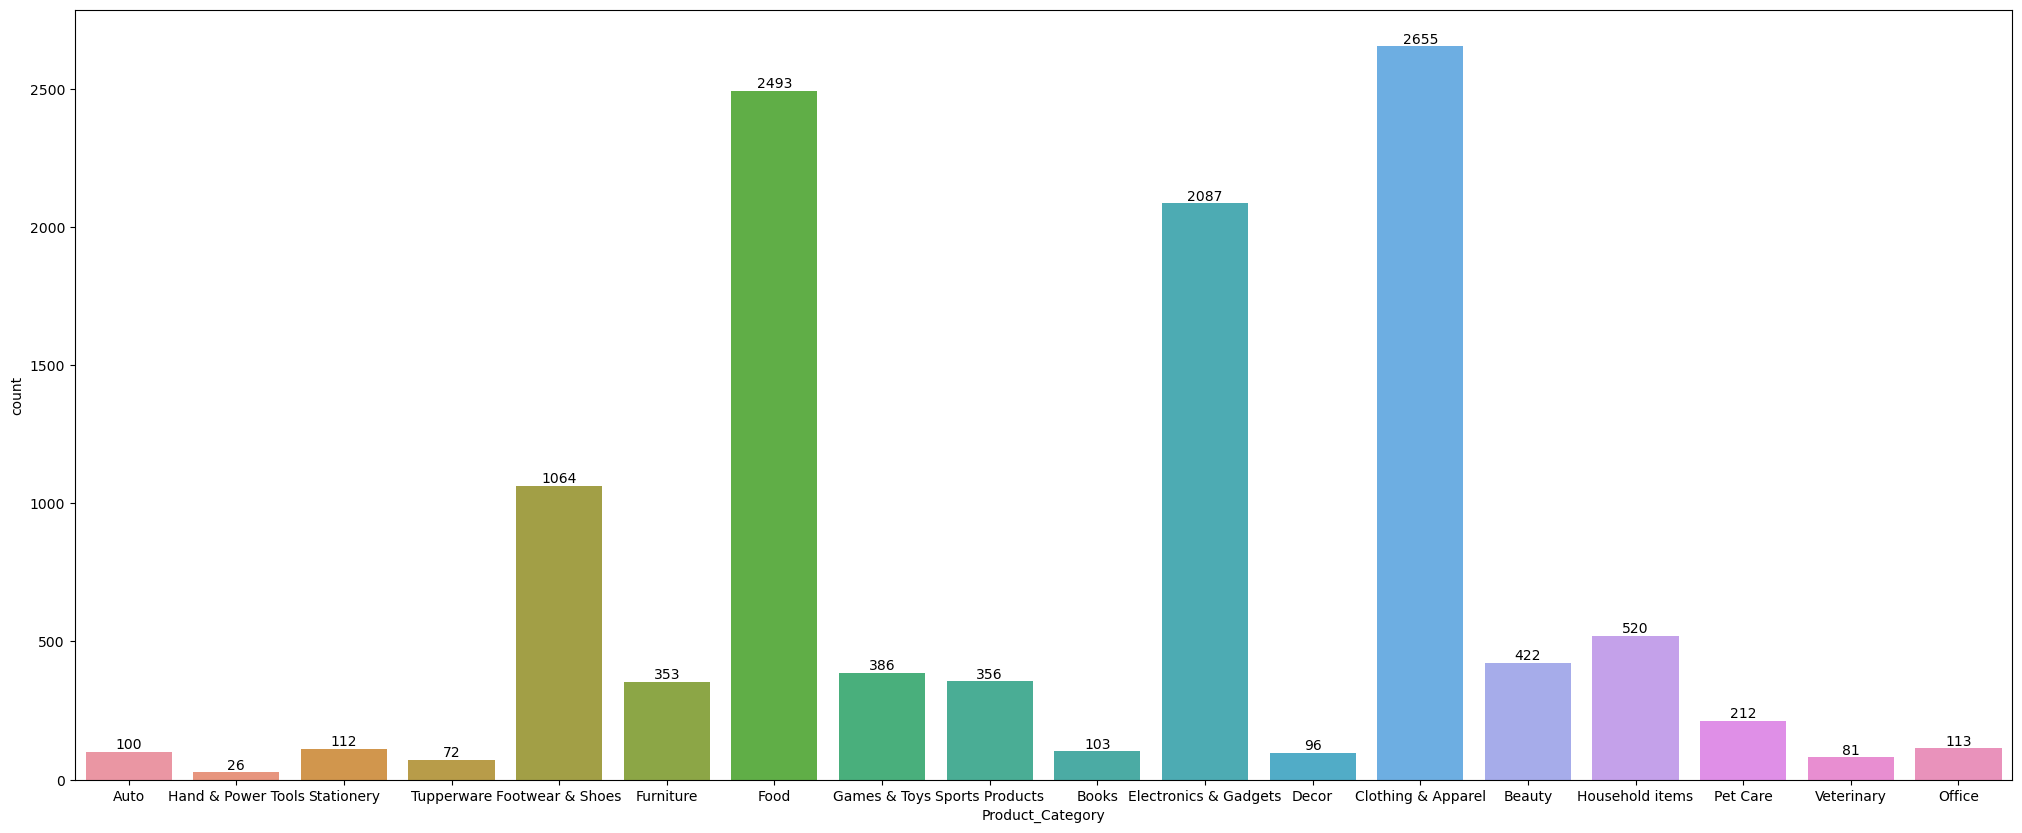

In [34]:
figure=plt.figure(figsize=(25,10))
                  
ax=sns.countplot(x= df['Product_Category'])
                  
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

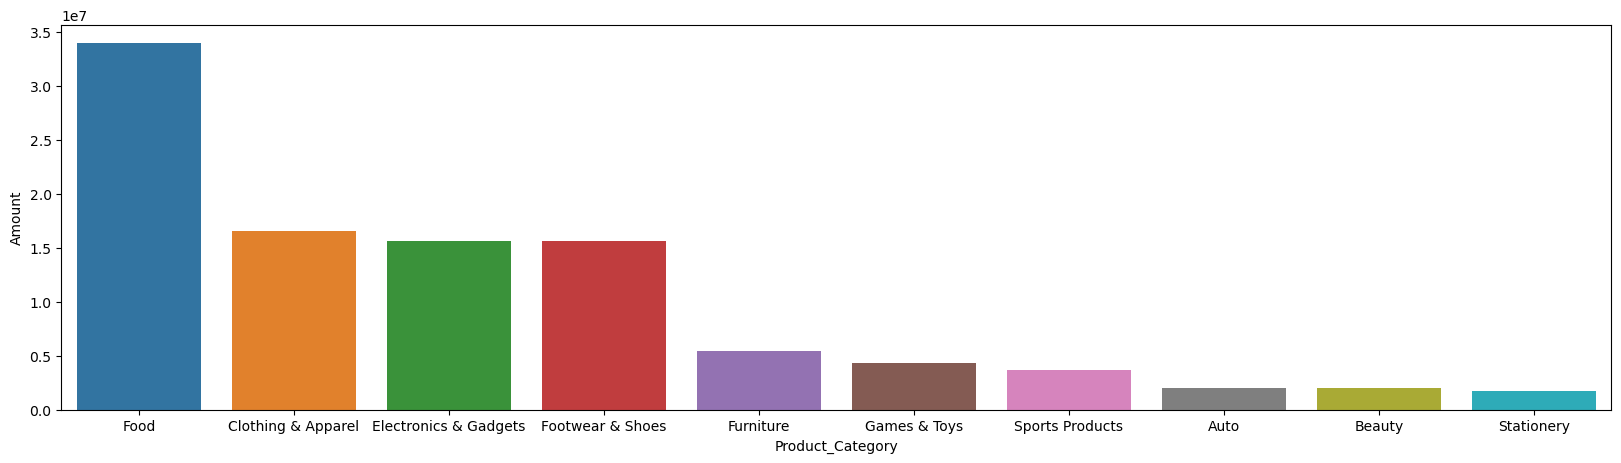

In [35]:
figure=plt.figure(figsize=(20,5))


sales_product=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False).head(10)

sns.barplot(x= 'Product_Category', y= 'Amount', data= sales_product)

From above graphs we can see that the most products sold are from Food, Clothing and Electronics category.

<Axes: xlabel='Product_ID', ylabel='Orders'>

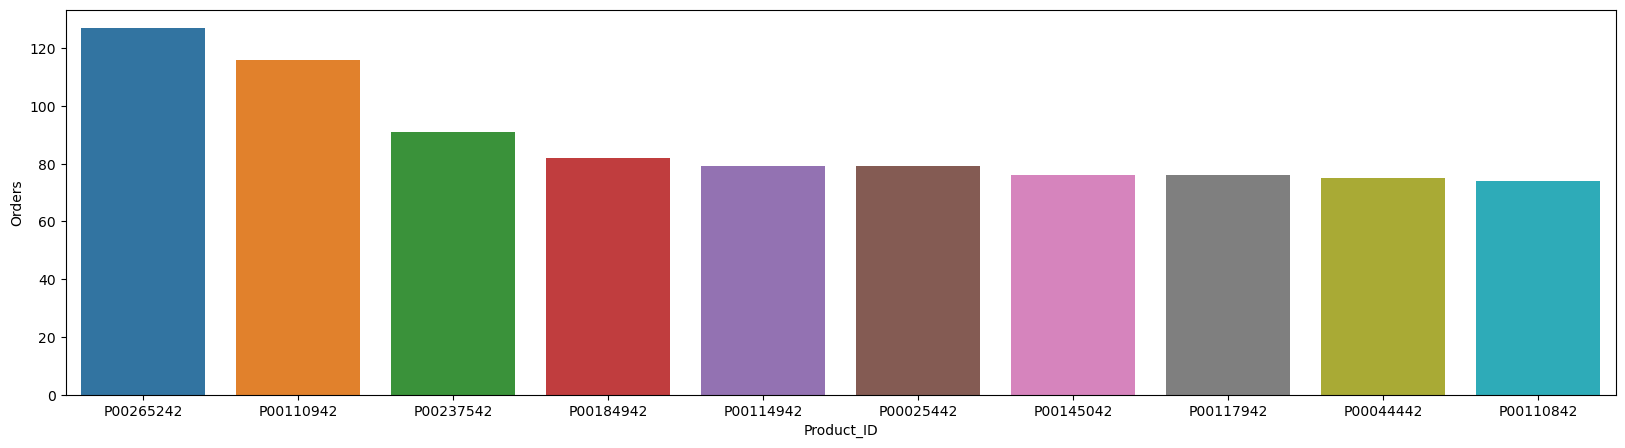

In [37]:
figure=plt.figure(figsize=(20,5))

sales_state=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False).head(10)

sns.barplot(x= 'Product_ID', y= 'Orders', data= sales_state)

<Axes: xlabel='Product_ID'>

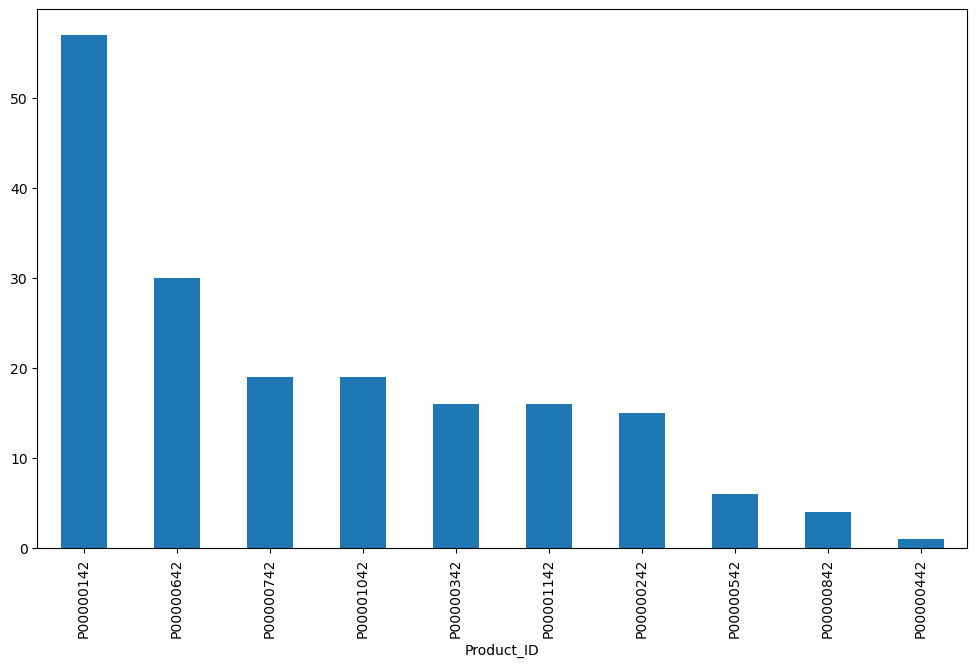

In [52]:
# top 10 most sold products 

figure=plt.figure(figsize=(12,7))

df.groupby('Product_ID')['Orders'].sum().head(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.